## Creating synthetic classification datasets of different shapes

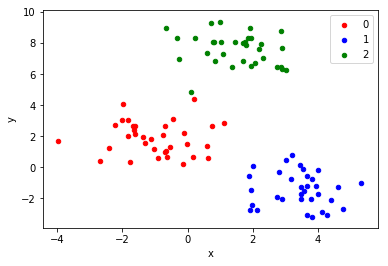

In [2]:
# simple cluster shape

from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

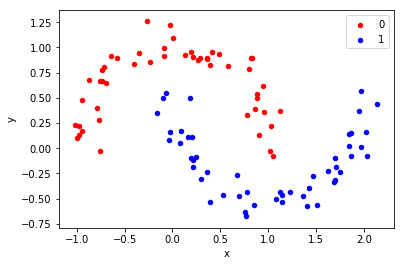

In [4]:
# moon shape

from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

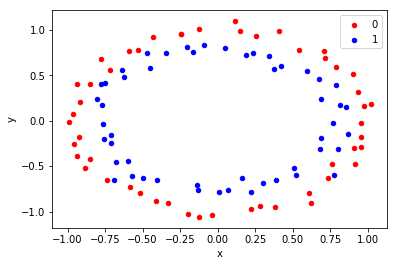

In [6]:
# Circular shape

from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

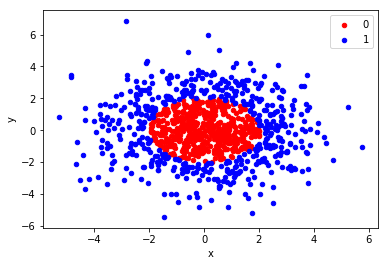

In [11]:
# Simple guassian shape

from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=2,
                                 n_classes=2, random_state=1)

df = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

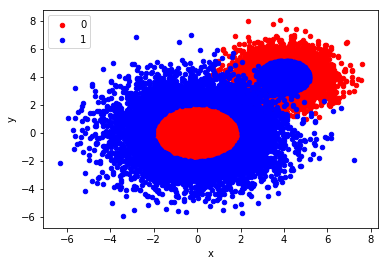

In [20]:
# Complex guassian shape

from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import numpy as np

# Construct dataset

# Gaussian 1
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=2,
                                 n_classes=2, random_state=1)

X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

# Gaussian 2

X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1,
                                 n_samples=5000, n_features=2,
                                 n_classes=2, random_state=1)

X2 = pd.DataFrame(X2,columns=['x','y'])
y2 = pd.Series(y2)

# Combine the gaussians

X = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))

df = DataFrame(dict(x=X.values[:,0], y=X.values[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Using the make_classification API

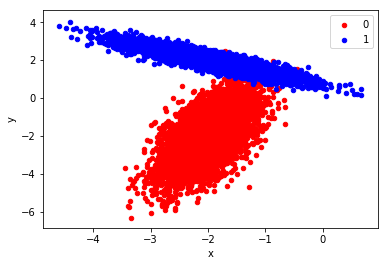

In [21]:
# Generate Clean data

from sklearn.datasets import make_classification

X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

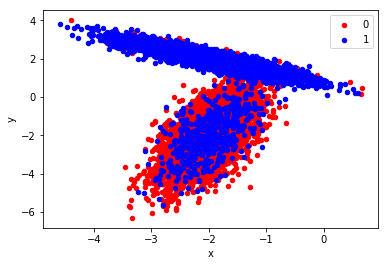

In [22]:
# Generate noisy Data

X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

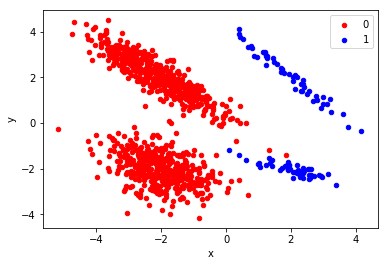

In [23]:
# Generate Imbalanced Data

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.9,0.1], random_state=17)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

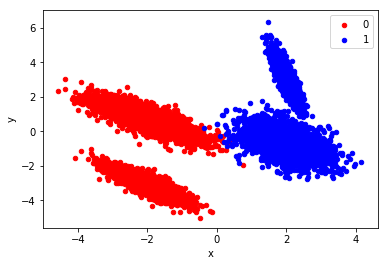

In [24]:
# Using redundant features - 2 Useful features and 3rd feature as Linear Combination of first 2

X,y = make_classification(n_samples=10000, n_features=3, n_informative=2, n_redundant=1, n_repeated=0, n_classes=2,
                          n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# to prove create a similar dataset with no redundant features. Plot both using PCA in 2D to find out that the redundant 
# feature one is separable in 2D

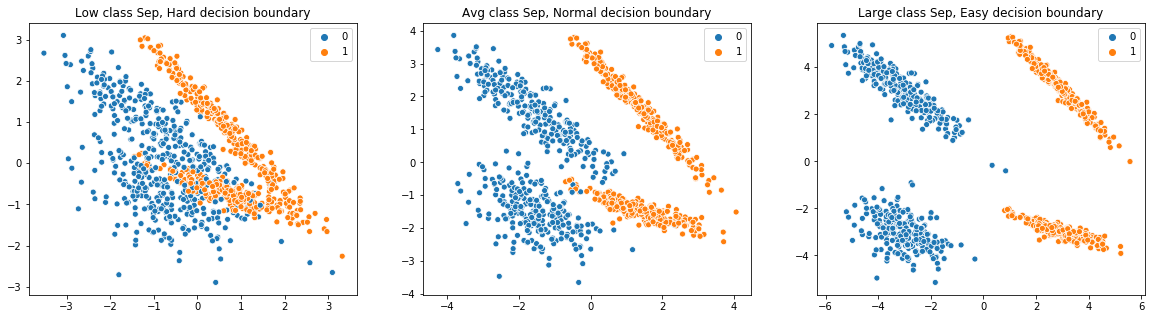

In [27]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import seaborn as sns

# Low class Sep, Hard decision boundary

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=0.75,flip_y=0,weights=[0.5,0.5], random_state=17)

f, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("Low class Sep, Hard decision boundary");

# Avg class Sep, Normal decision boundary

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=1.5,flip_y=0,weights=[0.5,0.5], random_state=17)

sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Avg class Sep, Normal decision boundary");

# Large class Sep, Easy decision boundary

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=3,flip_y=0,weights=[0.5,0.5], random_state=17)

sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax3);
ax3.set_title("Large class Sep, Easy decision boundary");

plt.show();

### Bonus Content

* [Machine Learning Mastery](https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/)
* [Towards Data Science](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922)
* [Related Jupyter Notebook](https://github.com/faizanahemad/data-science/blob/master/exploration_projects/imbalance-noise-oversampling/Generating%20and%20Visualizing%20Classification%20Data%20using%20scikit.ipynb)